In [665]:
# Librairies personnalisées
from my_functions.common_functions import *
from my_functions.uni_bi_variate_functions import *
from my_functions.machine_learning_common_functions import *
from my_functions.pca_functions import *

from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import KNNImputer, IterativeImputer

%matplotlib inline

low_memory=False # faible mémoire vive (RAM) pour gérer la lecture de gros fichiers

# Customers

In [666]:
# Chargement des Data Sets
customers = pd.read_csv('olist_customers_dataset.csv', low_memory=low_memory)

In [667]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Le data set contient :
	- 99441 lignes et 5 colonnes.
	- 0 valeurs manquantes, ce qui représente 0.0 % du data set.
Voici un sous-échantillon aléatoire :


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
77655,1e1746d4456c3743892253a404e04439,fb99cfd55992fdd347a3481dfb26c4fa,8247,sao paulo,SP
16273,76964a619f0023a78ae3d35c5a5f5a6a,927c6529111b5d41b8a8426c649e6d18,90540,porto alegre,RS


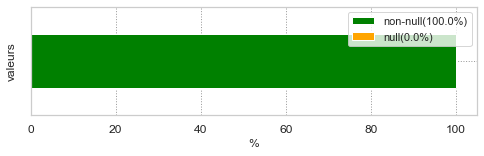

In [668]:
verifier_taille(customers)
afficher_echantillon(customers)

In [669]:
all_customers = customers.groupby('customer_unique_id').count().sort_values(by='customer_id',ascending=False)
all_customers

,customer_id,customer_zip_code_prefix,customer_city,customer_state
customer_unique_id,,,,
8d50f5eadf50201ccdcedfb9e2ac8455,17,17,17,17
3e43e6105506432c953e165fb2acf44c,9,9,9,9
6469f99c1f9dfae7733b25662e7f1782,7,7,7,7
ca77025e7201e3b30c44b472ff346268,7,7,7,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7,7,7,7
...,...,...,...,...
5657dfebff5868c4dc7e8355fea865c4,1,1,1,1
5657596addb4d7b07b32cd330614bdf8,1,1,1,1
5656eb169546146caeab56c3ffc3d268,1,1,1,1


In [670]:
frequent_customers = all_customers[all_customers['customer_id']>1]
frequent_customers

,customer_id,customer_zip_code_prefix,customer_city,customer_state
customer_unique_id,,,,
8d50f5eadf50201ccdcedfb9e2ac8455,17,17,17,17
3e43e6105506432c953e165fb2acf44c,9,9,9,9
6469f99c1f9dfae7733b25662e7f1782,7,7,7,7
ca77025e7201e3b30c44b472ff346268,7,7,7,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7,7,7,7
...,...,...,...,...
5cfc9643603c095fd7ed86a50fa17887,2,2,2,2
cfb025f193db116549c9c23e4d58e3e3,2,2,2,2
609b7feab0f0c9726929ec4891447b02,2,2,2,2


In [671]:
print(round(len(frequent_customers)/len(all_customers)*100, 2), '% des cliens ont passées plus d\'une commande')

3.12 % des cliens ont passées plus d'une commande


# Orders

In [672]:
orders = pd.read_csv('olist_orders_dataset.csv', low_memory=low_memory)
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


# df = Customers x Orders

In [673]:
df = pd.merge(customers[['customer_unique_id', 'customer_id']], orders[['customer_id', 'order_id']], how='inner', on=['customer_id']).drop(columns='customer_id')
print('Doublons :', len(doublons(df['order_id'])))
df

Doublons : 0


,customer_unique_id,order_id
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f
...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298
99437,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b
99438,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c
99439,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2


In [674]:
nb_orders = df.groupby(['customer_unique_id']).count().reset_index(level=0).sort_values(by='order_id', ascending=False)
nb_orders

,customer_unique_id,order_id
52973,8d50f5eadf50201ccdcedfb9e2ac8455,17
23472,3e43e6105506432c953e165fb2acf44c,9
37797,6469f99c1f9dfae7733b25662e7f1782,7
76082,ca77025e7201e3b30c44b472ff346268,7
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...,...
32508,5657dfebff5868c4dc7e8355fea865c4,1
32507,5657596addb4d7b07b32cd330614bdf8,1
32506,5656eb169546146caeab56c3ffc3d268,1
32505,5656a8fabc8629ff96b2bc14f8c09a27,1


# Orders Items

In [675]:
order_items = pd.read_csv('olist_order_items_dataset.csv', low_memory=low_memory)
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


Sum the prices

In [676]:
order_prices = order_items[['order_id','price', 'freight_value']].groupby('order_id').sum().reset_index(level=0)
order_prices.sort_values(by='price', ascending=False)

,order_id,price,freight_value
1455,03caa2c082116e1d31e67e9ae3700499,13440.00,224.08
44467,736e1922ae60d0d6a89247b851902527,7160.00,114.88
3130,0812eb902a67711a1cb742b3cdaa65ae,6735.00,194.31
98298,fefacc66af859508bf1a7934eab1e97f,6729.00,193.21
94439,f5136e38d1a14a4dbd87dff67da82701,6499.00,227.66
...,...,...,...
21805,38bcb524e1c38c2c1b60600a80fc8999,2.90,8.72
89758,e8bbc1d69fee39eee4c72cb5c969e39d,2.29,7.78
93208,f1d5c2e6867fa93ceee9ef9b34a53cbf,2.20,7.39
24174,3ee6513ae7ea23bdfab5b9ab60bffcb5,0.85,18.23


# df = Customers x Orders x Orders Prices

In [677]:
df = pd.merge(df, order_prices, how='inner', on=['order_id'])
print('Doublons :', len(doublons(df['order_id'])))
df

Doublons : 0


,customer_unique_id,order_id,price,freight_value
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,124.99,21.88
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,289.00,46.48
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,139.94,17.79
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,149.94,23.36
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,230.00,22.25
...,...,...,...,...
98661,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,74.90,13.88
98662,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,114.90,14.16
98663,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,37.00,19.04
98664,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,689.00,22.07


# Orders Payments

In [678]:
order_payments = pd.read_csv('olist_order_payments_dataset.csv', low_memory=low_memory)
order_payments#sort_values(by='payment_sequential', ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [679]:
order_payments.groupby('order_id').sum().sort_values(by='payment_value', ascending=False)

,payment_sequential,payment_installments,payment_value
order_id,,,
03caa2c082116e1d31e67e9ae3700499,1,1,13664.08
736e1922ae60d0d6a89247b851902527,1,1,7274.88
0812eb902a67711a1cb742b3cdaa65ae,1,8,6929.31
fefacc66af859508bf1a7934eab1e97f,1,1,6922.21
f5136e38d1a14a4dbd87dff67da82701,1,1,6726.66
...,...,...,...
e8bbc1d69fee39eee4c72cb5c969e39d,1,1,10.07
f1d5c2e6867fa93ceee9ef9b34a53cbf,3,2,9.59
c8c528189310eaa44a745b8d9d26908b,1,1,0.00


In [680]:
order_payments[order_payments['payment_sequential']>1].sort_values(by=['order_id', 'payment_sequential'], ascending=False).head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
28537,ffc730a0615d28ec19f9cad02cb41442,2,credit_card,1,12.63
3009,ffa39020fe7c8a3e907320e1bec4b985,2,voucher,1,64.01
21648,ffa1dd97810de91a03abd7bd76d2fed1,2,voucher,1,418.73
11583,ff978de32e717acd3b5abe1fb069d2b6,4,voucher,1,7.68
28611,ff978de32e717acd3b5abe1fb069d2b6,3,voucher,1,0.66
26914,ff978de32e717acd3b5abe1fb069d2b6,2,voucher,1,10.80
96028,ff7400d904161b62b6e830b3988f5cbd,2,voucher,1,100.00
24664,ff20ee702706d9e407a34de9fe2ff768,2,voucher,1,50.00
95767,ff1f8f328e5a59ac754240b6dd31bcb4,4,voucher,1,26.03
75488,ff1f8f328e5a59ac754240b6dd31bcb4,3,voucher,1,142.58


In [681]:
order_payments[order_payments['order_id']=='ff978de32e717acd3b5abe1fb069d2b6']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
11583,ff978de32e717acd3b5abe1fb069d2b6,4,voucher,1,7.68
26914,ff978de32e717acd3b5abe1fb069d2b6,2,voucher,1,10.80
28611,ff978de32e717acd3b5abe1fb069d2b6,3,voucher,1,0.66
46828,ff978de32e717acd3b5abe1fb069d2b6,1,voucher,1,30.00


In [682]:
df[df['order_id']=='ff978de32e717acd3b5abe1fb069d2b6']

,customer_unique_id,order_id,price,freight_value
35372,7e1ca53dbea2514cb38bb0de60e8f16b,ff978de32e717acd3b5abe1fb069d2b6,27.99,21.15


# Payments

In [683]:
payments = order_payments[['order_id', 'payment_sequential', 'payment_installments', 'payment_value']].groupby('order_id').agg({'payment_sequential':'max', 'payment_installments': 'max', 'payment_value': 'sum'}).reset_index(level=0)
payments.sort_values('payment_sequential', ascending=False)

,order_id,payment_sequential,payment_installments,payment_value
97261,fa65dad1b0e818e3ccc5cb0e39231352,29,1,457.99
79611,ccf804e764ed5650cd8759557269dc13,26,1,62.68
15577,285c2e15bebd4ac83635ccc563dc71f4,22,1,40.85
53168,895ab968e7bb0d5659d16cd74cd1650c,21,1,161.32
92724,ee9ca989fc93ba09a6eddc250ce01742,19,1,82.73
...,...,...,...,...
33713,56ca2955a23551796d37da2e384c7139,1,1,30.10
33712,56c9b97f31031c70ffb000219dc6f403,1,8,163.81
33711,56c93a3f93a1e7eb24ed51a6931dc488,1,1,933.70
33710,56c898abec8a6fd5e84ffc42904c4f65,1,10,478.33


In [684]:
payments[payments['order_id']=='ff978de32e717acd3b5abe1fb069d2b6']

,order_id,payment_sequential,payment_installments,payment_value
99293,ff978de32e717acd3b5abe1fb069d2b6,4,1,49.14


# Payements Type

In [685]:
payment_type = order_payments[['order_id','payment_type']].drop_duplicates(subset='order_id')
payment_type

,order_id,payment_type
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card
3,ba78997921bbcdc1373bb41e913ab953,credit_card
4,42fdf880ba16b47b59251dd489d4441a,credit_card
...,...,...
103881,0406037ad97740d563a178ecc7a2075c,boleto
103882,7b905861d7c825891d6347454ea7863f,credit_card
103883,32609bbb3dd69b3c066a6860554a77bf,credit_card
103884,b8b61059626efa996a60be9bb9320e10,credit_card


# df = Customers x Orders x Orders Prices x Payements x Payements Type

In [686]:
df = pd.merge(df, payments, how='inner', on=['order_id'])
df = pd.merge(df, payment_type, how='inner', on=['order_id'])
print('Doublons :', len(doublons(df['order_id'])))
df

Doublons : 0


,customer_unique_id,order_id,price,freight_value,payment_sequential,payment_installments,payment_value,payment_type
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,124.99,21.88,1,2,146.87,credit_card
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,289.00,46.48,1,8,335.48,credit_card
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,139.94,17.79,1,7,157.73,credit_card
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,149.94,23.36,1,1,173.30,credit_card
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,230.00,22.25,1,8,252.25,credit_card
...,...,...,...,...,...,...,...,...
98660,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,74.90,13.88,1,6,88.78,credit_card
98661,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,114.90,14.16,1,3,129.06,credit_card
98662,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,37.00,19.04,1,5,56.04,credit_card
98663,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,689.00,22.07,1,2,711.07,credit_card


# Reviews

In [687]:
reviews = pd.read_csv('olist_order_reviews_dataset.csv', low_memory=low_memory)
print('Doublons :', len(doublons(reviews['order_id'])))
reviews = reviews[['order_id', 'review_score']].groupby('order_id').mean().reset_index(level=0)
print('Doublons :', len(doublons(reviews['order_id'])))
reviews

Doublons : 551
Doublons : 0


,order_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,5.0
1,00018f77f2f0320c557190d7a144bdd3,4.0
2,000229ec398224ef6ca0657da4fc703e,5.0
3,00024acbcdf0a6daa1e931b038114c75,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0
...,...,...
98668,fffc94f6ce00a00581880bf54a75a037,5.0
98669,fffcd46ef2263f404302a634eb57f7eb,5.0
98670,fffce4705a9662cd70adb13d4a31832d,5.0
98671,fffe18544ffabc95dfada21779c9644f,5.0


# df = Customers x Orders x Orders Prices x Payements x Payements Type x Reviews

In [688]:
df = pd.merge(df, reviews[['order_id', 'review_score']], how='inner', on=['order_id'])
print('Doublons :', len(doublons(df['order_id'])))
df

Doublons : 0


,customer_unique_id,order_id,price,freight_value,payment_sequential,payment_installments,payment_value,payment_type,review_score
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,124.99,21.88,1,2,146.87,credit_card,4.0
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,289.00,46.48,1,8,335.48,credit_card,5.0
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,139.94,17.79,1,7,157.73,credit_card,5.0
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,149.94,23.36,1,1,173.30,credit_card,5.0
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,230.00,22.25,1,8,252.25,credit_card,5.0
...,...,...,...,...,...,...,...,...,...
97911,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,74.90,13.88,1,6,88.78,credit_card,4.0
97912,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,114.90,14.16,1,3,129.06,credit_card,5.0
97913,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,37.00,19.04,1,5,56.04,credit_card,1.0
97914,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,689.00,22.07,1,2,711.07,credit_card,5.0


# Analyse Exploratoire

In [689]:
df.describe()

,price,freight_value,payment_sequential,payment_installments,payment_value,review_score
count,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000
mean,137.534315,22.804160,1.045314,2.929491,160.367686,4.105087
std,209.483686,21.621084,0.381034,2.712610,219.286727,1.330286
min,0.850000,0.000000,1.000000,0.000000,9.590000,1.000000
25%,45.900000,13.840000,1.000000,1.000000,61.930000,4.000000
50%,86.900000,17.160000,1.000000,2.000000,105.280000,5.000000
75%,149.900000,24.010000,1.000000,4.000000,176.760000,5.000000
max,13440.000000,1794.960000,29.000000,24.000000,13664.080000,5.000000


In [690]:
df.loc[df['payment_installments']==0, :]

,customer_unique_id,order_id,price,freight_value,payment_sequential,payment_installments,payment_value,payment_type,review_score
13474,9925e1d7dff0d807355599dee04830ab,1a57108394169c0b47d8f876acc9ba2d,83.38,46.56,2,0,129.94,credit_card,5.0
78439,f54cea27c80dc09bfe07b1cf1e01b845,744bade1fcf9ff3f31d860ace076d422,45.90,12.79,2,0,58.69,credit_card,5.0


In [691]:
df.loc[df['payment_installments']==0, 'payment_installments'] = 1

In [692]:
df.describe()

,price,freight_value,payment_sequential,payment_installments,payment_value,review_score
count,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000
mean,137.534315,22.804160,1.045314,2.929511,160.367686,4.105087
std,209.483686,21.621084,0.381034,2.712591,219.286727,1.330286
min,0.850000,0.000000,1.000000,1.000000,9.590000,1.000000
25%,45.900000,13.840000,1.000000,1.000000,61.930000,4.000000
50%,86.900000,17.160000,1.000000,2.000000,105.280000,5.000000
75%,149.900000,24.010000,1.000000,4.000000,176.760000,5.000000
max,13440.000000,1794.960000,29.000000,24.000000,13664.080000,5.000000


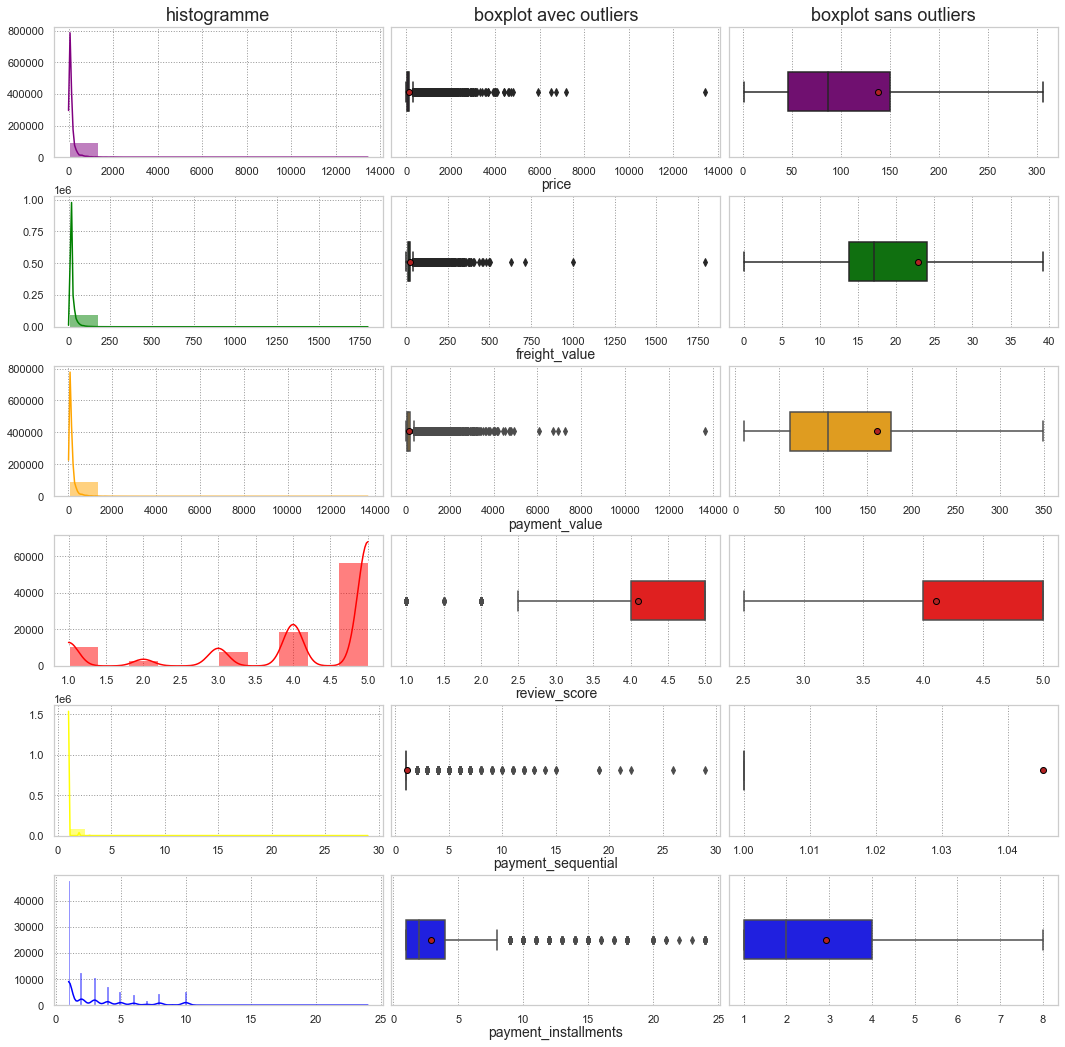

In [693]:
histo_distribution(df)

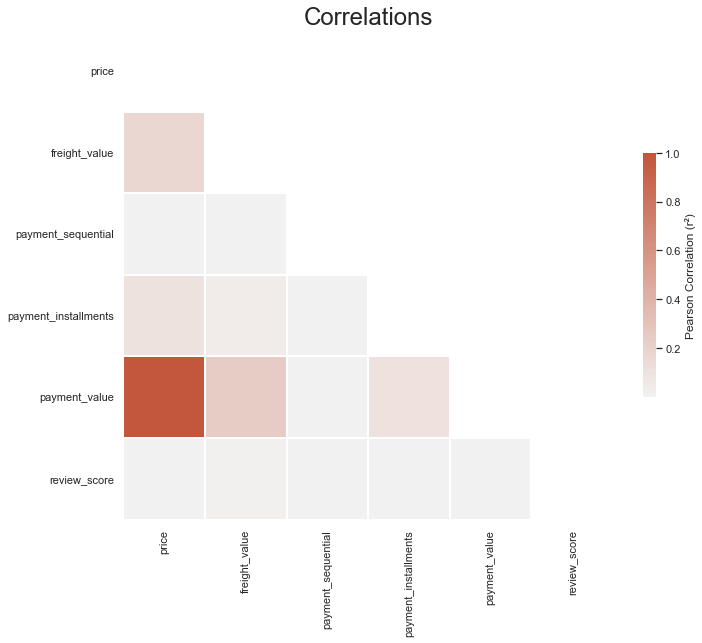

In [694]:
correlation_matrix(df)

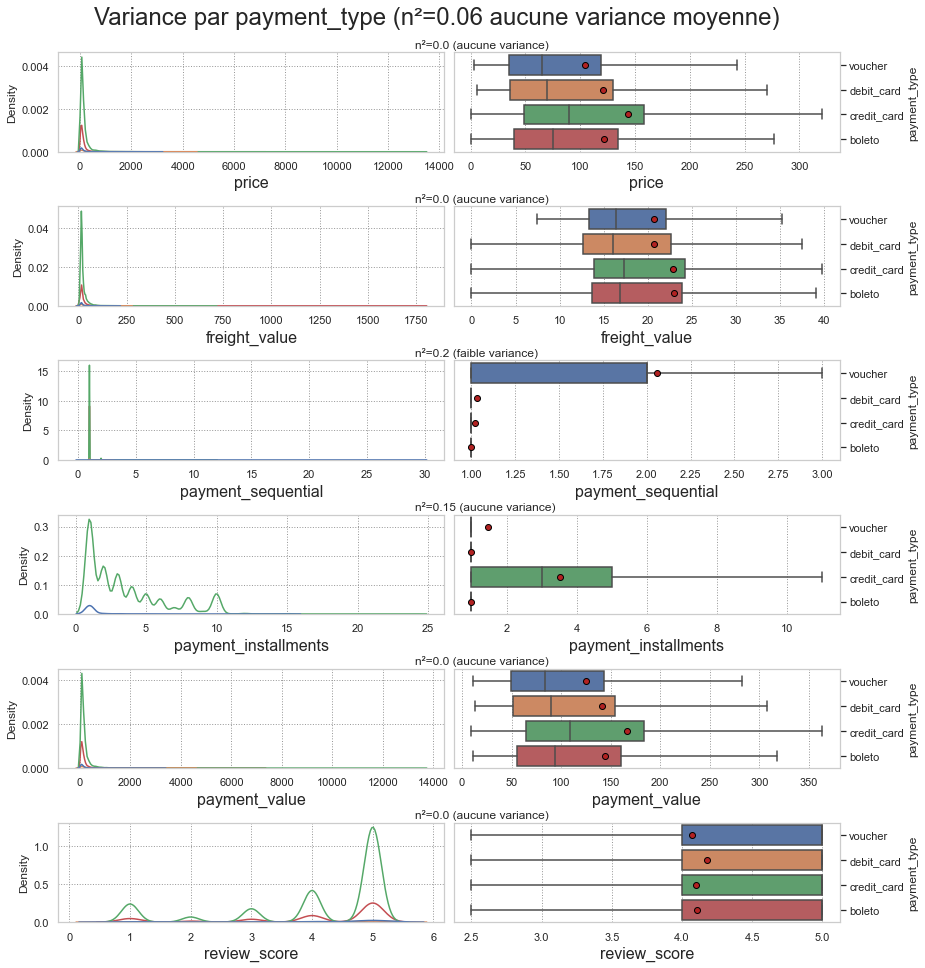

In [695]:
X = 'payment_type'
ANOVA(df, X, yloc=0.92, hspace=0.55, width=7, heigth=0.7)